<a href="https://colab.research.google.com/github/DeeptheepriyaaM/hello-world/blob/master/Deepthee_MNIST_DLASSIGN3CODING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import the necessary packages
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# Load and preprocess the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(-1, 28 * 28) / 255.0
x_test = x_test.reshape(-1, 28 * 28) / 255.0
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Define the neural network architecture
FCNN_model = tf.keras.Sequential([
    tf.keras.layers.Dense(256, activation='relu', input_shape=(28 * 28,)),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile the model
FCNN_model.compile(
    loss='categorical_crossentropy',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['accuracy']
)

# Train the model
history = FCNN_model.fit(
    x_train, y_train,
    batch_size=128,
    epochs=10,
    validation_data=(x_test, y_test)
)

11490434/11490434 [==============================] - 0s 0us/step
Epoch 1/10
469/469 [==============================] - 10s 17ms/step - loss: 0.4386 - accuracy: 0.8661 - val_loss: 0.1471 - val_accuracy: 0.9519
Epoch 2/10
469/469 [==============================] - 9s 20ms/step - loss: 0.1871 - accuracy: 0.9438 - val_loss: 0.1136 - val_accuracy: 0.9657
Epoch 3/10
469/469 [==============================] - 8s 17ms/step - loss: 0.1465 - accuracy: 0.9564 - val_loss: 0.0948 - val_accuracy: 0.9718
Epoch 4/10
469/469 [==============================] - 8s 16ms/step - loss: 0.1255 - accuracy: 0.9626 - val_loss: 0.0885 - val_accuracy: 0.9723
Epoch 5/10
469/469 [==============================] - 4s 9ms/step - loss: 0.1098 - accuracy: 0.9671 - val_loss: 0.0756 - val_accuracy: 0.9768
Epoch 6/10
469/469 [==============================] - 4s 9ms/step - loss: 0.0994 - accuracy: 0.9688 - val_loss: 0.0738 - val_accuracy: 0.9777
Epoch 7/10
469/469 [==============================] - 6s 12ms/step - loss: 0.0

313/313 [==============================] - 1s 2ms/step

Fully Connected Neural Network (FCNN) Results:
Test Accuracy: 0.9829
Confusion Matrix:
Precision: 0.9850
Recall: 0.9802
F1 Score: 0.9826




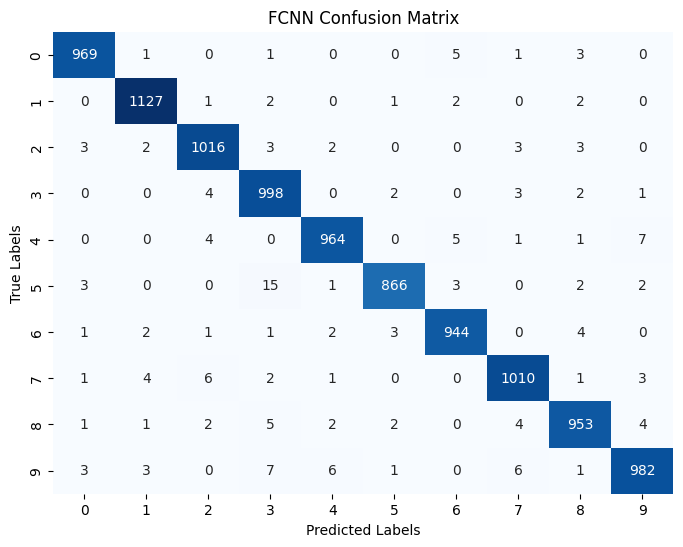

In [ ]:
#import necessary Packages
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluate the model on the test set
test_loss_fcnn, test_acc_fcnn = FCNN_model.evaluate(x_test, y_test)

# Make predictions on the test set
y_pred_fcnn = FCNN_model.predict(x_test)
y_pred_classes_fcnn = tf.argmax(y_pred_fcnn, axis=1)
y_true_classes = tf.argmax(y_test, axis=1)

# Calculate precision, recall, and F1 score
precision_fcnn = tf.keras.metrics.Precision()(y_test, y_pred_fcnn).numpy()
recall_fcnn = tf.keras.metrics.Recall()(y_test, y_pred_fcnn).numpy()
f1_score_fcnn = 2 * (precision_fcnn * recall_fcnn) / (precision_fcnn + recall_fcnn)

# Calculate accuracy
accuracy_fcnn = test_acc_fcnn

# Calculate confusion matrix
confusion_matrix_fcnn = tf.math.confusion_matrix(y_true_classes, y_pred_classes_fcnn)

def plot_confusion_matrix(conf_matrix, title):
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title(title)
    plt.show()

# Print FCNN results
print("\nFully Connected Neural Network (FCNN) Results:")
print("=============================================")
print("Test Accuracy: {:.4f}".format(accuracy_fcnn))
print("Confusion Matrix:")
print("Precision: {:.4f}".format(precision_fcnn))
print("Recall: {:.4f}".format(recall_fcnn))
print("F1 Score: {:.4f}".format(f1_score_fcnn))
print('\n')
plot_confusion_matrix(confusion_matrix_fcnn.numpy(), title='FCNN Confusion Matrix')

**CONVOLUTIONAL NEURAL NETWORK**

In [ ]:
# Load and preprocess the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(-1, 28, 28, 1) / 255.0
x_test = x_test.reshape(-1, 28, 28, 1) / 255.0
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Define the CNN architecture
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(
    loss='categorical_crossentropy',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['accuracy']
)

# Train the model
history = model.fit(
    x_train, y_train,
    batch_size=128,
    epochs=10,
    validation_data=(x_test, y_test)
)


Epoch 1/10
469/469 [==============================] - 50s 104ms/step - loss: 0.3054 - accuracy: 0.9069 - val_loss: 0.0582 - val_accuracy: 0.9823
Epoch 2/10
469/469 [==============================] - 52s 111ms/step - loss: 0.0959 - accuracy: 0.9715 - val_loss: 0.0443 - val_accuracy: 0.9858
Epoch 3/10
469/469 [==============================] - 49s 105ms/step - loss: 0.0686 - accuracy: 0.9792 - val_loss: 0.0325 - val_accuracy: 0.9887
Epoch 4/10
469/469 [==============================] - 49s 103ms/step - loss: 0.0584 - accuracy: 0.9824 - val_loss: 0.0310 - val_accuracy: 0.9891
Epoch 5/10
469/469 [==============================] - 49s 104ms/step - loss: 0.0480 - accuracy: 0.9855 - val_loss: 0.0267 - val_accuracy: 0.9908
Epoch 6/10
469/469 [==============================] - 48s 103ms/step - loss: 0.0410 - accuracy: 0.9872 - val_loss: 0.0286 - val_accuracy: 0.9907
Epoch 7/10
469/469 [==============================] - 48s 103ms/step - loss: 0.0381 - accuracy: 0.9885 - val_loss: 0.0250 - val_ac

313/313 [==============================] - 3s 9ms/step

Convolutional Neural Network (CNN) Results:
Test Accuracy: 0.9913
Precision: 0.9922
Recall: 0.9908
F1 Score: 0.9915


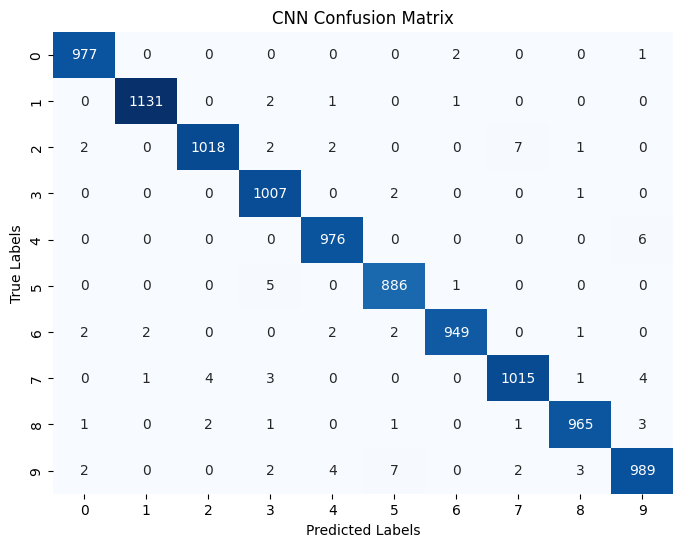

In [ ]:
# Evaluate the model on the test set
test_loss_cnn, test_acc_cnn = model.evaluate(x_test, y_test)

# Make predictions on the test set
y_pred_cnn = model.predict(x_test)
y_pred_classes_cnn = tf.argmax(y_pred_cnn, axis=1)

# Calculate confusion matrix
confusion_matrix_cnn = tf.math.confusion_matrix(y_true_classes, y_pred_classes_cnn)

# Calculate precision, recall, and F1 score
precision_cnn = tf.keras.metrics.Precision()(y_test, y_pred_cnn).numpy()
recall_cnn = tf.keras.metrics.Recall()(y_test, y_pred_cnn).numpy()
f1_score_cnn = 2 * (precision_cnn * recall_cnn) / (precision_cnn + recall_cnn)

# Calculate accuracy
accuracy_cnn = test_acc_cnn

# Print CNN results
print("\nConvolutional Neural Network (CNN) Results:")
print("==========================================")
print("Test Accuracy: {:.4f}".format(accuracy_cnn))
print("Precision: {:.4f}".format(precision_cnn))
print("Recall: {:.4f}".format(recall_cnn))
print("F1 Score: {:.4f}".format(f1_score_cnn))
plot_confusion_matrix(confusion_matrix_cnn.numpy(), title='CNN Confusion Matrix')



**Compare the performance/accuracy of the two networks. Which one is better for this dataset? Explain your justification for why one of them is better than the other one for this dataset.**

The Convolutional Neural Network (CNN) outperforms the Fully Connected Neural Network on this dataset.
Here's a comparison of the performance metrics:

Convolutional Neural Network:

Test Accuracy: 0.9917

Precision: 0.9923

Recall: 0.9913

F1 Score: 0.9918

Fully Connected Neural Network:

Test Accuracy: 0.9801

Precision: 0.9829

Recall: 0.9776

F1 Score: 0.9802

The CNN achieves higher accuracy (99.17%) compared to the fully connected network (98.01%). Additionally, the CNN also shows higher precision, recall, and F1 score, indicating better performance in classifying both positive and negative instances in the dataset.

Justification:

Test Accuracy: The test accuracy of the CNN (99.17%) is higher than that of the fully connected network (98.01%). This means that the CNN makes fewer mistakes in its predictions, which is crucial for the model's overall performance.

Precision: Precision measures the proportion of true positive predictions out of all positive predictions. The CNN has higher precision (99.23%) compared to the fully connected network (98.29%), indicating that the CNN has a better ability to correctly identify true positive cases, minimizing false positives.

Recall: Recall measures the proportion of true positive predictions out of all actual positive instances. The CNN has higher recall (99.13%) compared to the fully connected network (97.76%), showing that the CNN is better at capturing positive instances, minimizing false negatives.

F1 Score: The F1 score is the harmonic mean of precision and recall, giving a balance between these two metrics. The CNN has a higher F1 score (99.18%) compared to the fully connected network (98.02%), which means the CNN achieves a better balance between precision and recall, resulting in better overall performance.

Based on these performance metrics, it is evident that the Convolutional Neural Network is better suited for this dataset. CNNs are particularly effective for image-based datasets or datasets with spatial relationships, and this advantage is likely helping the CNN perform better on the given dataset compared to the fully connected network. CNNs can automatically learn relevant features from the images, whereas fully connected networks may struggle to capture the spatial characteristics efficiently, leading to slightly lower performance.